In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
#Collecting Data
data = pd.read_csv(r'Iris.csv')
data.head()

In [ ]:
data.drop(columns=['Id', 'Species'], inplace=True)
data.head()

In [ ]:
fig, axes = plt.subplots(4,1, figsize=(20,40))
for col, axis in zip(data.columns,axes):
    axis.hist(data[[col]], bins=3)
    axis.set_title(f'{col}')

In [ ]:
# Data Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(data)
# scaledX[:, 0]

fig1, axes1 = plt.subplots(4,1, figsize=(20,40))
for index, col, axis in zip(range(4), data.columns,axes1):
    axis.hist(scaledX[:, index], bins=3)
    axis.set_title(f'{col}')

In [ ]:
# MOdeling
from sklearn.cluster import DBSCAN

model = DBSCAN()
ypred = model.fit_predict(scaledX)
model.labels_

In [ ]:
## 
fig , axes = plt.subplots(1,1, figsize=(20,8))
axes.scatter(scaledX[:, 2], scaledX[:, 3], c=ypred)
axes.set_title("PetalLengthvsPetalWidth")


In [ ]:
fig1 = plt.figure(figsize=(20,8))
axes1 = plt.axes(projection='3d')
axes1.scatter3D(scaledX[:, 1], scaledX[:, 2], scaledX[:, 3], c=ypred)
axes1.set_title("PetalLengthvsPetalWidth")
axes1.set_xlabel('SepalWidth')
axes1.set_ylabel('PetalLength')
axes1.set_zlabel('PetalWidth')

In [ ]:
eps = np.linspace(0.5, 0.9, 10)
minSamples = np.arange(3,7)
params = np.array(np.meshgrid(eps, minSamples)).T.reshape(-1, 2)
params

In [ ]:
for e, m in params:
    model = DBSCAN(eps=e, min_samples=int(m))
    ypred = model.fit_predict(scaledX)
    fig2 = plt.figure(figsize=(20,8))
    axes2 = plt.axes(projection='3d')
    axes2.scatter3D(scaledX[:, 1], scaledX[:, 2], scaledX[:, 3], c=ypred, edgecolor='black')
    axes2.set_title(f"Eps:{round(e,4)} || MinSamples: {int(m)} || {set(model.labels_)}")
    axes2.set_xlabel('SepalWidth')
    axes2.set_ylabel('PetalLength')
    axes2.set_zlabel('PetalWidth')

In [ ]:
eps = np.linspace(0.5, 0.9, 10)
minSamples = np.arange(5,8)
params = np.array(np.meshgrid(eps, minSamples)).T.reshape(-1, 2)
params

In [ ]:
# 
from sklearn.metrics import silhouette_score, silhouette_samples

# For all K
for e, m in params:
    dbscan = DBSCAN(eps=e, min_samples=int(m))
    ypred = dbscan.fit_predict(scaledX)
    sscore, sSample = silhouette_score(scaledX, ypred), silhouette_samples(scaledX, ypred)
    ylow = 10
    for i in set(dbscan.labels_):
        isample = sSample[ypred == i]
        isample.sort()
        yup = ylow + isample.shape[0]
        plt.fill_betweenx(np.arange(ylow, yup), 0, isample)
        plt.title(f'Eps:{round(e,4)} || MinSamples: {int(m)} || {set(dbscan.labels_)}-> Silhouette Score: {sscore}')
        ylow = yup+10
    plt.show()

In [ ]:
for e, m in params:
    dbscan = DBSCAN(eps=e, min_samples=int(m))
    ypred = dbscan.fit_predict(scaledX)
    sscore, sSample = silhouette_score(scaledX, ypred), silhouette_samples(scaledX, ypred)
    print(f'Eps:{round(e,4)} || MinSamples: {int(m)} || {set(dbscan.labels_)}-> Silhouette Score: {sscore}')   

Text(0.5, 0, 'PetalWidth')

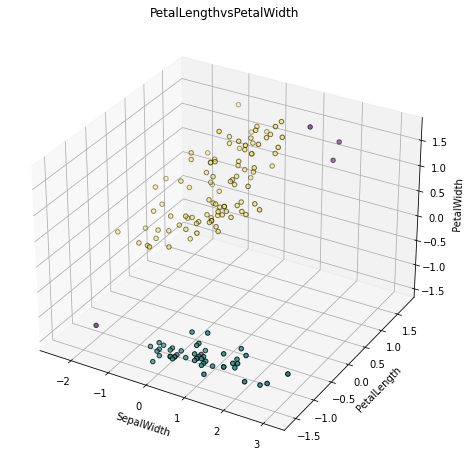

In [55]:
# Final Model

model = DBSCAN(eps=0.855)
ypred = model.fit_predict(scaledX)

fig1 = plt.figure(figsize=(20,8))
axes1 = plt.axes(projection='3d')
axes1.scatter3D(scaledX[:, 1], scaledX[:, 2], scaledX[:, 3], c=ypred, edgecolor='black')
axes1.set_title("PetalLengthvsPetalWidth")
axes1.set_xlabel('SepalWidth')
axes1.set_ylabel('PetalLength')
axes1.set_zlabel('PetalWidth')

In [52]:
ypred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)